In [3]:
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Generate a synthetic "Make Moons" dataset
X, y = make_moons(n_samples=300, noise=0.1, random_state=42)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5)
labels = dbscan.fit_predict(X)

# Identify core points, border points, and outliers
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
outliers = labels == -1  # Outliers are labeled as -1

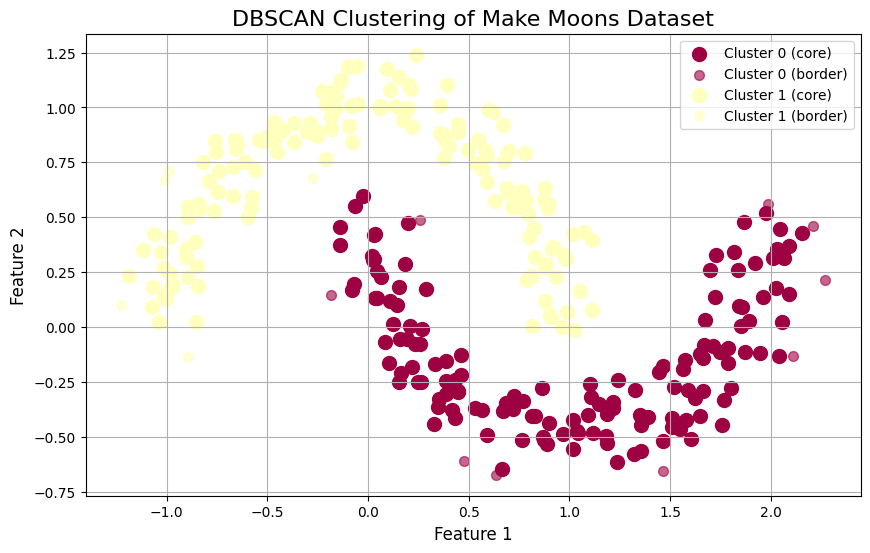

In [5]:
# Plot the results
plt.figure(figsize=(10, 6))
unique_labels = set(labels)

# Plot each cluster and the outliers
for label in unique_labels:
    if label == -1:
        # Outliers
        color = 'k'  # Black for outliers
        label_name = 'Outliers'
    else:
        color = plt.cm.Spectral(label / len(unique_labels))
        label_name = f'Cluster {label}'

    class_member_mask = labels == label
    plt.scatter(
        X[class_member_mask & core_samples_mask, 0],
        X[class_member_mask & core_samples_mask, 1],
        s=100,
        c=[color],
        label=f'{label_name} (core)'
    )
    plt.scatter(
        X[class_member_mask & ~core_samples_mask, 0],
        X[class_member_mask & ~core_samples_mask, 1],
        s=50,
        c=[color],
        alpha=0.6,
        label=f'{label_name} (border)' if label != -1 else None
    )

plt.title("DBSCAN Clustering of Make Moons Dataset", fontsize=16)
plt.xlabel("Feature 1", fontsize=12)
plt.ylabel("Feature 2", fontsize=12)
plt.legend(loc="best", fontsize=10)
plt.grid(True)
plt.show()

In [13]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load the Wine Quality dataset
# Replace 'winequality-red.csv' with the correct path to your dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url, sep=";")

# Prepare data: Remove target column (quality) and scale features
X = df.drop(columns=["quality"]).values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply DBSCAN
eps = 1.5  # Adjust based on data characteristics
min_samples = 5
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels = dbscan.fit_predict(X_scaled)

# Calculate outlier ratio and number of clusters
outliers = labels == -1
outlier_ratio = np.sum(outliers) / len(labels)
num_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(outliers)

[False False False ... False False  True]


In [17]:
# Print results
print(f"Outlier Ratio: {outlier_ratio:.2%}")
print(f"Outlier Count: {np.sum(outliers)}")
print(f"Number of Clusters: {num_clusters}")

# Optional: Count of points in each cluster
unique, counts = np.unique(labels, return_counts=True)
cluster_info = dict(zip(unique, counts))
print("Cluster Information (Label: Count):", cluster_info)

Outlier Ratio: 20.83%
Outlier Count: 333
Number of Clusters: 3
Cluster Information (Label: Count): {np.int64(-1): np.int64(333), np.int64(0): np.int64(1246), np.int64(1): np.int64(9), np.int64(2): np.int64(11)}
